### __Structured Data__

__*Numeric*__<br>
Data that are expressed on a numeric scale.

__Continuous:__ Data that can take on any value in an interval. <br>
__Discrete:__ Data that can take on only intger values, such as counts.

__*Categorical*__<br>
Data that can take on only a specific set of values representing a set of possible categories.

__Binary:__ A special case of categorical data with just two categories of values (*e.g.* 0 or 1, True or False). <br>
__Ordinal:__ Categorical data that has an explicit ordering

The basic data structure in data science is a rectangular matrix in which rows are records and columns are variables.

There are other data structures besides rectangular data. *Time series* records successive measurements of the same variable. It is the raw material for statistical forecasting methods, and a key component of the data produced by devices, sensors, etc.

*Spatial* data structures are used in mapping and location analytics.

*Graph* (or network) data structure are used to represent physical, social, and abstract relationships. Used to represent social network like Facebook or LinkedIn connections between people.

### __Estimates of Location__

Variables with measured or count data may have thousands of distinct values. A basic step in exploring your data is getting a "typical value" of each variable: gives an etimate where most of the data is located.

__*Mean*__ <br>
The sum of all values divided by the number of values.
*Synonym:* Average

__*Weighted Mean*__ <br>
The sum of all values times a weight devided by the sum of the weights.
*Synonym:* Weighted average

__*Median*__ <br>
The value such that one-half of the data lies above and below.
*Synonym:* 50th percentile

__*Percentile*__ <br>
The value such that P percent of the data lies below
*Synonym:* Quantile

__*Weighted median*__<br>
The value such that one-half of the sum of the weights lies above and below the sorted data.

__*Trimmed mean*__ <br>
The average of all values after dropping a fixed number of extreme values.
*Synonym:* Truncated mean

__*Robust*__
Not sensitive to extreme values.
*Synonym:* Resistant

__*Outlier*__ <br>
A data value that is very different from most of the data.
*Synonym:* extreme value

The basic metric for location is the mean, but it can be sensitive to extreme values (outliers). The other metrics (median, trimmed mean) are less sensitive to outliers and unusual distributions. Hence, they are more robust.

In [2]:
import pandas as pd
import numpy as np
from numpy import mean, median, absolute
from scipy.stats import trim_mean
from statistics import variance, stdev
import matplotlib.pyplot as plt

# Practicing on a Tokyo 2020 Olympics medals count dataset from kaggle:
# https://www.kaggle.com/berkayalan/2021-olympics-medals-in-tokyo/version/9

medal_count = pd.read_csv("Tokyo Medals 2021.csv")
medal_count


Matplotlib is building the font cache; this may take a moment.


,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3
...,...,...,...,...,...,...
88,Ghana,0,0,1,1,77
89,Grenada,0,0,1,1,77
90,Kuwait,0,0,1,1,77
91,Republic of Moldova,0,0,1,1,77


In [3]:
# Estimates of Location
# Mean of the total count of medals
medal_count["Total"].mean()

11.612903225806452

In [4]:
# Weighted mean with numpy
np.average(medal_count["Total"], weights=medal_count["Gold Medal"])

46.832352941176474

In [5]:
# Trimmed mean (calling 0.1 as the proportioncut means leaving out the top-most and bottom-most 10%)
trim_mean(medal_count["Total"], 0.1)

6.8933333333333335

In [6]:
# Median
medal_count["Total"].median()

4.0

In [7]:
# Percentile (75th)
np.percentile(medal_count["Total"], 75)

11.0

In [8]:
# Pandas has a method that can quickly output some of the above location estimates with .describe()
medal_count.describe()

,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,3.655914,3.634409,4.322581,11.612903,43.494624
std,7.022471,6.626339,6.210372,19.091332,24.171769
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000,23.000000
50%,1.000000,1.000000,2.000000,4.000000,47.000000
75%,3.000000,4.000000,5.000000,11.000000,66.000000
max,39.000000,41.000000,33.000000,113.000000,77.000000


### __Estimates of Variability__

The most used estimates of variation are based on the differences / *deviations* between the estimate of location and the observed data.

Consider a set of data: `[1, 4, 4]`
The mean is 3, and the median is 4. the deviations from the mean are:<br>
`1 - 3 = -2` <br>
`4 - 3 = 1` <br>
`4 - 3 = 1` <br>
These deviations tell us how dispersed the data is around the central value.

You can measure the variability by estimating a typical value for the deviations. A simple approach is to take the average of the absolute values of the deviations from the mean. From the previous example, the absolute values of the deviations are: `[2, 1, 1]`. Their average is (2 + 1 + 1)/3 = 1.33. This is called the __*mean absolute deviation*__.

The best-known estimates of variability are:<br>
 __*variance*__<br>
An average of the squared deviations; often denoted as $s^2$

<font size=3>$$s^{2}=\frac{\sum\limits_{n}^{i=1}|x_{i}-\overline{x}|}{n-1}$$</font>

 __*standard deviation*__<br>
 The square root of the variance; often denoted as $s$.
 <font size=3>$$s=\sqrt{Variance}$$</font>

 None of the above estimates of variability are robust to outliers. The variance and standard deviations are especially sensitive to outliers since they are based on the squared deviations.

In [9]:
# Variance
variance(medal_count["Gold Medal"])

49.315100514259

In [10]:
# Standard deviation
stdev(medal_count["Gold Medal"])

7.022471111671376

In [11]:
# Mean absolute deviation
mean(absolute(medal_count["Gold Medal"] - mean(medal_count["Gold Medal"])))

4.0048560527228485

In [12]:
# Mean absolute deviation
median(absolute(medal_count["Gold Medal"] - median(medal_count["Gold Medal"])))

1.0

### __Exploring the Data Distribution__

Contrasting to estimating the data in a single number to describe the location and variability, it is also useful to explore how the data is distributed overall.

__*Boxplot*__ <br>
A plot introduced by Turkey as a quick way to visualize the distribution of data. *Synonym:* box and whiskers plot

__*Frequency table*__ <br>
A tally of the count of numeric data values that fall into a set of intervals (bins).

__*Histogram*__ <br>
A plot of the frequecy table with the bins on the x-axis and the count on the y-axis. While visually similar, bar charts should not be confused with histograms.

__*Density plot*__ <br>
A smoothed version of the histogram, often based on a *kernel density estimate*. Shows the distribution of the data values as a continuous  line.

<AxesSubplot:>

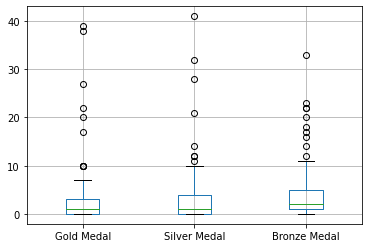

In [13]:
# Box plot using pandas .boxplot() method
medal_count.boxplot(column=["Gold Medal", "Silver Medal", "Bronze Medal"])

Percentiles are also valuable in summarizing the distribution (common to express the quartiles, and deciles). Expecially useful for summarizing the *tails* of the distribution.
In python you can use numpy's .percentile() or pandas' .quantile() methods to see the percentiles

In [14]:
# Frequency table
pd.cut(medal_count["Gold Medal"], 10).value_counts()

(-0.039, 3.9]    72
(3.9, 7.8]       11
(7.8, 11.7]       4
(19.5, 23.4]      2
(35.1, 39.0]      2
(15.6, 19.5]      1
(23.4, 27.3]      1
(11.7, 15.6]      0
(27.3, 31.2]      0
(31.2, 35.1]      0
Name: Gold Medal, dtype: int64

(array([72., 11.,  4.,  0.,  1.,  2.,  1.,  0.,  0.,  2.]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <BarContainer object of 10 artists>)

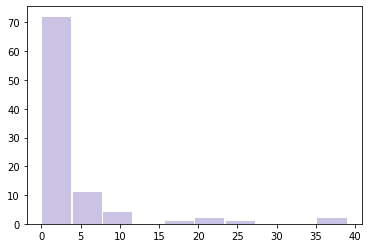

In [15]:
# Histogram
plt.hist(x=medal_count["Gold Medal"], bins=10, color="#CBC3E3", rwidth=0.95)

<AxesSubplot:ylabel='Density'>

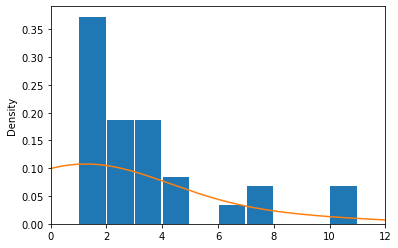

In [16]:
# Density plot
ax = medal_count["Gold Medal"].plot.hist(density=True, xlim=[0,12], bins=range(1,12), rwidth=.95)
medal_count["Gold Medal"].plot.density(ax=ax)

### __Exploring Binary and Categorical Data__

__*Mode*__
The most commonly occuring category or value in a data set.

__*Expected value*__
When the categories can be associated with a numeric value, this gives an average value based on a category's probability of occurrence.

__*Bar Charts*__
The frequency or proportion for each category plotted as bars.

__*Pie Charts*__
The frequency or proportion for each category plotted as wedges in a pie.

Text(0, 0.5, 'Count')

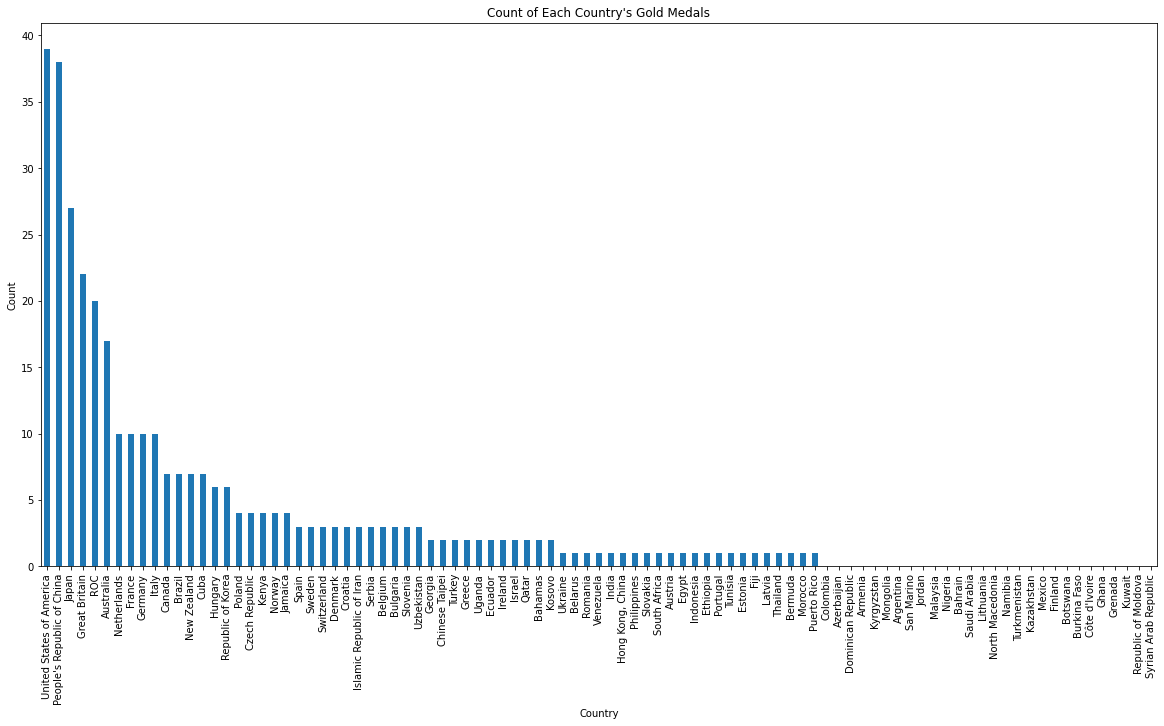

In [17]:
# Mode, which country has the most gold medals
ax = medal_count.plot.bar(x="Country", y="Gold Medal", legend=False, figsize=(20, 10))
ax.set_title("Count of Each Country's Gold Medals")
ax.set_xlabel("Country")
ax.set_ylabel("Count")

### __Correlation__

Variables X and Y are considered as positively correlated if high value of X corresponds to high value of Y, and vice versa. While negative correlation refers to when low X coresponds to high Y, and vice versa.

__*Correlation coefficient*__ <br>
A metric that measures the extent to which numeric variables are associated with one another (ranges from -1 to +1).

__*Correlation matrix*__ <br>
A table where the variables are shown on both rows and columns, and the cell values are the correlations between the variables.

__*Scatterplot*__ <br>
A plot in which the x-axis is the value of one variable, and the y-axis the value of another.

In [18]:
# Correlation pandas has a quick method .corr() that will output a correlation matrix
medal_count.corr()

,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
Gold Medal,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver Medal,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze Medal,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank By Total,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


<AxesSubplot:xlabel='Gold Medal', ylabel='Silver Medal'>

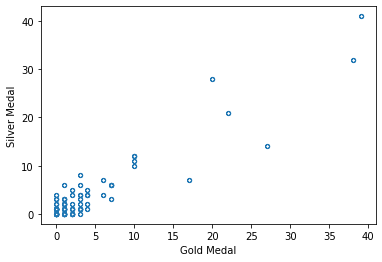

In [19]:
medal_count.plot.scatter(x="Gold Medal", y="Silver Medal", marker="$\u25EF$")

### Exploring Two or More Variables

__*Contingency table* <br>
A tally of counts between two or more categorical variables.

__*Hexagonal binning*__ <br>
A plot of two numeric variables with the recods binned into hexagons.

__*Contour plot*__ <br>
A plot showing the density of two numeric variables like a topographical map.

__*Violin plot*__ <br>
Similar to a bloxplot but showing the density estimate.

<AxesSubplot:xlabel='Gold Medal', ylabel='Silver Medal'>

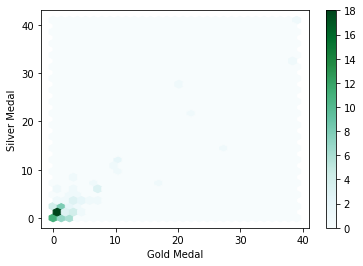

In [20]:
# Hexagonal binning
medal_count.plot.hexbin(x="Gold Medal", y="Silver Medal", gridsize=30, sharex=False)